In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# Drop rows with "unknown"
df = df[~df.isin(['unknown']).any(axis=1)]

In [6]:
# Identify categorical columns (excluding the target 'deposit')
categorical_columns = df.select_dtypes(include='object').columns.drop('deposit')

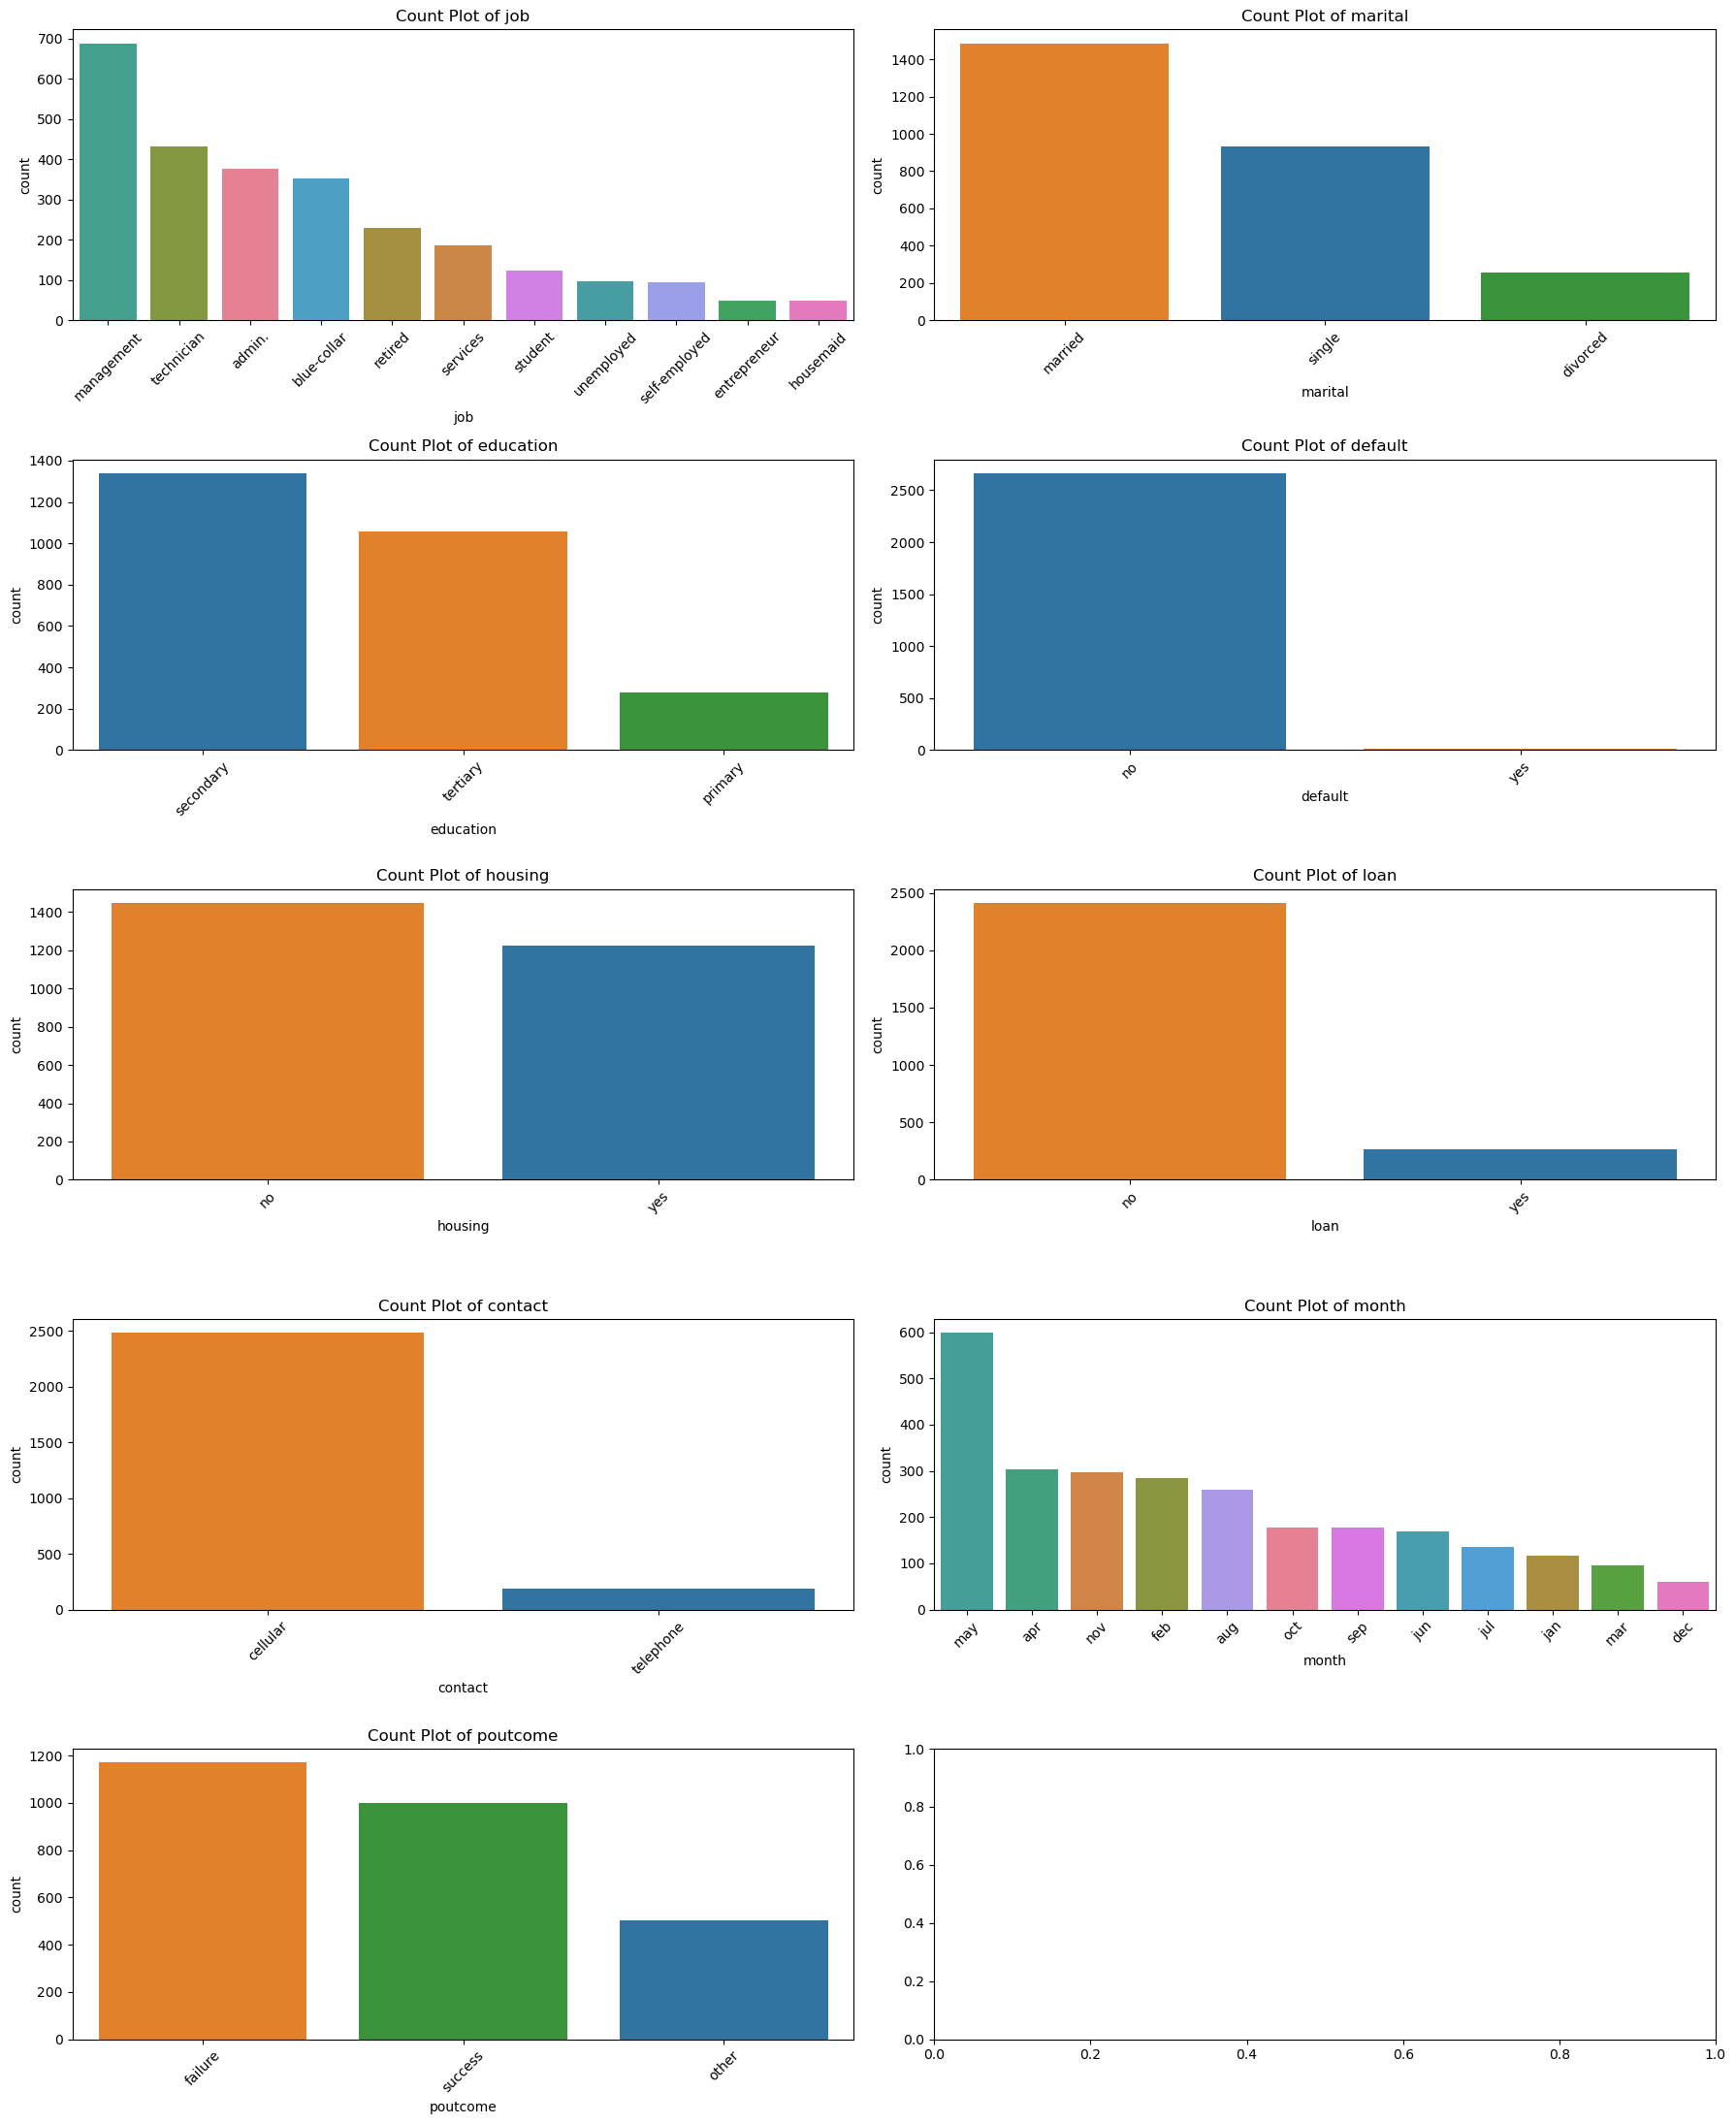

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 22))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index, hue=col)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Encode target column separately
df['deposit'] = label_encoder.fit_transform(df['deposit'])  # yes = 1, no = 0

In [9]:
# 5. Split features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

In [10]:
# 7. Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 9. Build Deep Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 10. Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6497 - loss: 0.6341 - val_accuracy: 0.7710 - val_loss: 0.5123
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7946 - loss: 0.4824 - val_accuracy: 0.7991 - val_loss: 0.4622
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.4359 - val_accuracy: 0.8107 - val_loss: 0.4506
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8315 - loss: 0.3998 - val_accuracy: 0.8131 - val_loss: 0.4424
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8238 - loss: 0.4012 - val_accuracy: 0.8131 - val_loss: 0.4370
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8390 - loss: 0.3835 - val_accuracy: 0.8131 - val_loss: 0.4332
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8270 - loss: 0.4156 - val_accuracy: 0.8107 - val_loss: 0.4327
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8428 - loss: 0.3743 - val_accuracy: 0.8061 - val_los

In [13]:
# 11. Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8299 - loss: 0.4037

✅ Test Accuracy: 0.8280


In [14]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_prob > 0.5).astype("int32").flatten()
y_true = y_test.to_numpy()

# Show confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion Matrix:
 [[132  51]
 [ 41 311]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       183
           1       0.86      0.88      0.87       352

    accuracy                           0.83       535
   macro avg       0.81      0.80      0.81       535
weighted avg       0.83      0.83      0.83       535

